# Introduction to Pandas

## 1. What is pandas?
## Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
## 2. Why is pandas so popular?
## Pandas is the *de facto* standard in data analysis and data manipulation in Python. In the backend it stores data as NumPy arrays, which in turns gives C-like performance whilst mantaining code simplicity.
## 3. Any drawback to be aware off?
## Pandas is very memory consuming, if a .csv file is X MB, you should expect pandas to take around 5-10 X memory in your RAM. This becomes a problem if you want to load several GB worth of data. Hence, scalability is not ideal and other technologies should be considered to ingest GB or TB sized data streams


# Pandas Series

## Pandas series are the simplest structure available in Pandas. They, describe a dataset labelled by a index and a single column. For instance, this could be a time-series of a stock price. 

### To create a DataFrame we use the method ```pd.Series()``` (https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

### One of the easyest ways to create a Series is using a dictionary. The keys of the dictionary will be transformed into indices and the values will be the corresponding values

In [1]:
import pandas as pd
print(pd.__version__)

2.1.1


In [2]:
my_series=pd.Series(data={"a":1,"b":2,"c":3})
my_series

a    1
b    2
c    3
dtype: int64

### One can create more complex series by feeding the index and data separately

In [3]:
import pandas as pd
import numpy as np
# We create a date range
dates = pd.date_range('20200101', periods=200)
# And some random values for a stock
stock_value=100+np.random.normal(0,1,200)

df = pd.Series(data=stock_value, index=dates, name='stock_price')

print(df)
print(type(df))

2020-01-01     97.406073
2020-01-02    100.569837
2020-01-03    100.234908
2020-01-04    100.404254
2020-01-05    100.723828
                 ...    
2020-07-14    100.645714
2020-07-15     98.683655
2020-07-16    100.007277
2020-07-17     98.905566
2020-07-18     99.652419
Freq: D, Name: stock_price, Length: 200, dtype: float64
<class 'pandas.core.series.Series'>


### We can access the index attribute using the ```.index``` attribute and we can access the values using the ```.values``` attribute

In [4]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18'],
              dtype='datetime64[ns]', length=200, freq='D')

In [5]:
df.values

array([ 97.40607275, 100.56983677, 100.23490803, 100.40425377,
       100.72382788,  99.46622543,  99.40837792, 100.50974345,
        99.48685976,  99.23501198,  98.30881305,  98.74541866,
        98.79837657, 101.70181437,  99.53204553,  99.7882306 ,
       100.58631536, 101.0958177 ,  99.14264491, 101.04634523,
       100.68735155,  98.12937615, 100.38137524, 100.10418058,
       100.79027975, 100.4031014 ,  99.36343866,  98.1807714 ,
        98.65964946, 100.87069132, 101.00821019,  99.79210459,
       100.80217202, 101.31151989,  99.77183045, 100.64473559,
        98.80599655,  99.62909244,  99.45121049, 100.27091793,
       100.12455012,  99.32620952,  99.96978123,  99.47530618,
       100.17520995,  99.78061818,  99.22296695, 100.948902  ,
       100.12864062,  99.4034445 ,  98.12000198,  97.58727892,
       100.40547767, 101.5589939 , 100.36172963, 100.75379156,
        99.45593263,  97.79751511,  97.23331553, 100.97380718,
        99.39384859,  99.40885168, 100.27208777, 100.04

### To access elements of the series, we can use slicing similar to numpy arrays and lists. The big difference is that we need to use the index keys to access elements or ranges

In [6]:
print(df[::2])#valid
print("----------------")
print(df[:-10])
print("----------------")
print(df[1:-10])

2020-01-01     97.406073
2020-01-03    100.234908
2020-01-05    100.723828
2020-01-07     99.408378
2020-01-09     99.486860
                 ...    
2020-07-09     98.964030
2020-07-11     99.042868
2020-07-13     99.893878
2020-07-15     98.683655
2020-07-17     98.905566
Freq: 2D, Name: stock_price, Length: 100, dtype: float64
----------------
2020-01-01     97.406073
2020-01-02    100.569837
2020-01-03    100.234908
2020-01-04    100.404254
2020-01-05    100.723828
                 ...    
2020-07-04    100.153320
2020-07-05    101.597933
2020-07-06    100.391760
2020-07-07     99.273776
2020-07-08     99.407352
Freq: D, Name: stock_price, Length: 190, dtype: float64
----------------
2020-01-02    100.569837
2020-01-03    100.234908
2020-01-04    100.404254
2020-01-05    100.723828
2020-01-06     99.466225
                 ...    
2020-07-04    100.153320
2020-07-05    101.597933
2020-07-06    100.391760
2020-07-07     99.273776
2020-07-08     99.407352
Freq: D, Name: stock_price, 

### We can also range with dates, since they are the index

In [7]:
df['2020-01-01':'2022-04-03']

2020-01-01     97.406073
2020-01-02    100.569837
2020-01-03    100.234908
2020-01-04    100.404254
2020-01-05    100.723828
                 ...    
2020-07-14    100.645714
2020-07-15     98.683655
2020-07-16    100.007277
2020-07-17     98.905566
2020-07-18     99.652419
Freq: D, Name: stock_price, Length: 200, dtype: float64

### If we want to access scalar values we either use the correct index or the ```.at[index]``` method. The following are equivalent

In [8]:
print(df['2020-01-01'])
print(df.at['2020-01-01'])

97.406072754346
97.406072754346


### If we want to access slices we can also use the  ```.loc[array_index]``` method. The following are equivalent

In [9]:
print(df.loc[['2020-01-01','2020-01-03']])
print(df[['2020-01-01','2020-01-03']])

2020-01-01     97.406073
2020-01-03    100.234908
Name: stock_price, dtype: float64
2020-01-01     97.406073
2020-01-03    100.234908
Name: stock_price, dtype: float64


### **Note**: Indexes can be any array of objects in python, ordered or not. See examples below

In [10]:
# We create a index with a integer list
my_index=[3,2,1]
# And some random values for a stock
stock_value=100+np.random.normal(0,1,3)

df1 = pd.Series(stock_value, index=my_index, name='stock_price')

print(df1)
print(type(df1))
df1.index

3    100.222933
2    100.010486
1    100.827527
Name: stock_price, dtype: float64
<class 'pandas.core.series.Series'>


Index([3, 2, 1], dtype='int64')

In [11]:
# We create a index with a integer list
my_index=["Jan","Feb","Mar"]
# And some random values for a stock
stock_value=100+np.random.normal(0,1,3)

df2 = pd.Series(stock_value, index=my_index, name='stock_price')

print(df2)
print(type(df2))
df2.index

Jan    99.542326
Feb    97.942364
Mar    99.261337
Name: stock_price, dtype: float64
<class 'pandas.core.series.Series'>


Index(['Jan', 'Feb', 'Mar'], dtype='object')

###  Pandas series offer a number of functionalities, like plotting the data in a very straightforward manner (for more info visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)

<Axes: title={'center': 'Stock value'}>

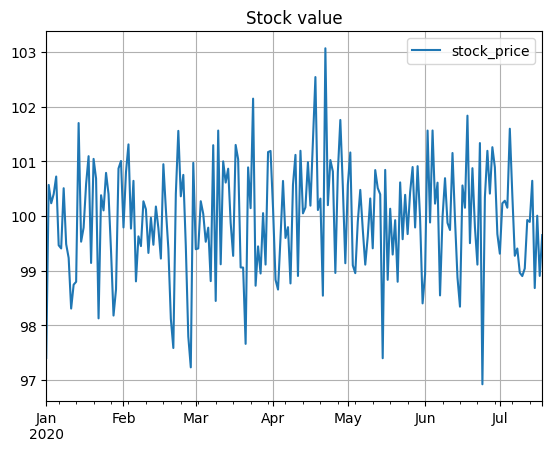

In [12]:
df.plot(title="Stock value",grid=True,legend=True)

### Another useful feature is to be able to display summary statistics of our data set using the ```.describe()```class method

In [13]:
df.describe()

count    200.000000
mean      99.954387
std        1.025479
min       96.923827
25%       99.273407
50%      100.023892
75%      100.656123
max      103.069383
Name: stock_price, dtype: float64

### **Note:** the desribe method returns a series as well

In [14]:
type(df.describe())

pandas.core.series.Series

### We can also display first/last n rows using ```head(n)``` or ```tail(n)``` that also return series

In [15]:
df.head(5)

2020-01-01     97.406073
2020-01-02    100.569837
2020-01-03    100.234908
2020-01-04    100.404254
2020-01-05    100.723828
Freq: D, Name: stock_price, dtype: float64

In [16]:
type(df.head(5))

pandas.core.series.Series

In [17]:
df.tail(2)

2020-07-17    98.905566
2020-07-18    99.652419
Freq: D, Name: stock_price, dtype: float64

### **Note** that ```head(n)``` or ```tail(n)``` are equivalent to slicing with ```[:n]``` or ```[-n:]``` respectively

---
# Pandas DataFrames
### Before advancing further, let's introduce the concept of a dataframe. A Pandas DataFrame is a collection of Series labelled by the same index, e.g. it could be a collection of Series of Stock prices labelled by their timestamp. 

### To create a DataFrame we use the method ```pd.DataFrame()``` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)


In [18]:
# We create a date range
dates = pd.date_range('20200101', periods=200)
# And some random values for a stock
stock_value=100+np.random.normal(0,1,(200,4))

df = pd.DataFrame(stock_value, index=dates, columns=['stock_a','stock_b','stock_c','stock_d'])

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,stock_a,stock_b,stock_c,stock_d
2020-01-01,99.526251,100.380813,100.569788,100.331037
2020-01-02,101.291802,100.441684,99.816871,101.609364
2020-01-03,101.429010,99.268337,97.498888,101.613948
2020-01-04,99.759497,99.282048,99.909002,100.993088
2020-01-05,100.684562,100.286558,99.038100,99.037731
...,...,...,...,...
2020-07-14,100.746691,101.596820,100.524621,101.051682
2020-07-15,100.694003,100.237887,101.438243,101.264984
2020-07-16,98.819100,101.845437,100.025388,102.097633
2020-07-17,100.544430,99.664078,99.082524,98.403272


### Let's have a look at some examples looking at the```yfinance``` library

In [19]:
import yfinance

AAPL = yfinance.download("AAPL") # gets Apple's data

[*********************100%%**********************]  1 of 1 completed


In [20]:
type(AAPL) # Check data typr

pandas.core.frame.DataFrame

In [21]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900


### As mentioned, before ```yfinance``` provides us with a dataframe directly with a number of columns, that can then be accessed by typing ```dataframe.columns```, and likewise for the index, which can be accessed using  ```dataframe.index```. The values in turn, can be accessed using the attribute ```dataframe.vales```

In [22]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
AAPL.index


DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-30', '2023-10-31', '2023-11-01',
               '2023-11-02', '2023-11-03'],
              dtype='datetime64[ns]', name='Date', length=10815, freq=None)

In [24]:
AAPL.values

array([[1.28347993e-01, 1.28905997e-01, 1.28347993e-01, 1.28347993e-01,
        9.94495079e-02, 4.69033600e+08],
       [1.22210003e-01, 1.22210003e-01, 1.21652000e-01, 1.21652000e-01,
        9.42611545e-02, 1.75884800e+08],
       [1.13280997e-01, 1.13280997e-01, 1.12723000e-01, 1.12723000e-01,
        8.73425975e-02, 1.05728000e+08],
       ...,
       [1.71000000e+02, 1.74229996e+02, 1.70119995e+02, 1.73970001e+02,
        1.73970001e+02, 5.69349000e+07],
       [1.75520004e+02, 1.77779999e+02, 1.75460007e+02, 1.77570007e+02,
        1.77570007e+02, 7.73348000e+07],
       [1.74240005e+02, 1.76820007e+02, 1.73350006e+02, 1.76649994e+02,
        1.76649994e+02, 7.97637000e+07]])

### ***Remark***: ```.values ``` casts a dataframe or series into a numpy array. Note that this operation will return a pure numpy array without the original index

---
# Quick comment on storing and loading dataframes
### Pandas offers a number of format compatibility like ```dataframe.to_csv``` .csv,  ```dataframe.to_pickle``` .pickle etc. The difference between picke and csv is that with pickle python will repect the types of index/values as opposed to csv where it will do a best guess

In [25]:
AAPL.to_csv('AAPL.csv',index=True)
pd.read_csv('AAPL.csv',index_col=0)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900


### Note that we lost the type of the index

In [26]:
pd.read_csv('AAPL.csv',index_col=0).index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
       '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object', name='Date', length=10815)

In [27]:
AAPL.to_pickle('AAPL.pickle')
pd.read_pickle('AAPL.pickle')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900


In [28]:
pd.read_pickle('AAPL.pickle').index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-30', '2023-10-31', '2023-11-01',
               '2023-11-02', '2023-11-03'],
              dtype='datetime64[ns]', name='Date', length=10815, freq=None)

### Here pickle respects the original index type

---
# Back to DataFrames

## Slicing DataFrames

### Perhaps, not all the information in a dataframe is relevant to us and often case we want to either remove part of it or transform it. Let us start by selecting a single column from the dataframe above. There are a numbers of ways to do this operation:

In [29]:
# Let's assume we are interested in adjclose column in AAPL dataframe
AAPL_close=AAPL.Close # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2023-10-30    170.289993
2023-10-31    170.770004
2023-11-01    173.970001
2023-11-02    177.570007
2023-11-03    176.649994
Name: Close, Length: 10815, dtype: float64

In [30]:
# Equivalently we can use 
AAPL_close=AAPL['Close'] # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2023-10-30    170.289993
2023-10-31    170.770004
2023-11-01    173.970001
2023-11-02    177.570007
2023-11-03    176.649994
Name: Close, Length: 10815, dtype: float64

### We can also use the loc method, as opposed to series, for dataframes ```.loc``` takes two arguments ```.loc[array_index,array_columns]```

In [31]:
# Equivalently we can use 
AAPL_close=AAPL.loc[:,'Close'] # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2023-10-30    170.289993
2023-10-31    170.770004
2023-11-01    173.970001
2023-11-02    177.570007
2023-11-03    176.649994
Name: Close, Length: 10815, dtype: float64

### ***Remark***:  Slicing a dataframe into a single column returns  a Series! Slicing multiple Columns return a DataFrame!

### If we want to obtain a DataFrame as output we can use double brackets with the columns (see below)

In [32]:
AAPL_close=AAPL.loc[:,['Close']]
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.frame.DataFrame'>


,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-10-30,170.289993
2023-10-31,170.770004
2023-11-01,173.970001


In [33]:
AAPL[['Close']]

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-10-30,170.289993
2023-10-31,170.770004
2023-11-01,173.970001


In [34]:
#Let's slice high and low
AAPL_high_low=AAPL.loc[:,['Low','High']]
print(type(AAPL_high_low))
AAPL_high_low

<class 'pandas.core.frame.DataFrame'>


,Low,High
Date,,
1980-12-12,0.128348,0.128906
1980-12-15,0.121652,0.122210
1980-12-16,0.112723,0.113281
1980-12-17,0.115513,0.116071
1980-12-18,0.118862,0.119420
...,...,...
2023-10-30,168.869995,171.169998
2023-10-31,167.899994,170.899994
2023-11-01,170.119995,174.229996


## Slicing using integer indexing

### Sometimes we might not care about the specific name that a column has or the especific indexing convention e.g. we might just be interest in the 1st value of the 1st column. We can use the ```.iloc``` (integer locator) method to access such elements using the convention ```.iloc[array_integer_index,array_integer_columns]``` same **as if we where slicing a 2D numpy array**

In [35]:
AAPL.iloc[:,2]# all rows only 3rd column

Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2023-10-30    168.869995
2023-10-31    167.899994
2023-11-01    170.119995
2023-11-02    175.460007
2023-11-03    173.350006
Name: Low, Length: 10815, dtype: float64

In [36]:
AAPL.iloc[2,:]# 3rd row all columns

Open         1.132810e-01
High         1.132810e-01
Low          1.127230e-01
Close        1.127230e-01
Adj Close    8.734260e-02
Volume       1.057280e+08
Name: 1980-12-16 00:00:00, dtype: float64

In [37]:
AAPL.iloc[2:4,2:4]# 3-4 rows and 3-4 columns

,Low,Close
Date,,
1980-12-16,0.112723,0.112723
1980-12-17,0.115513,0.115513


---
# ```.loc``` vs ```.at```  | ```.iloc``` vs ```.iat```

### What is the difference between ```.loc``` and ```.at```? ```loc``` returns either a scalar value or an array, whereas ```at``` only works for scalar retrieval

### What is the difference between ```.iloc``` and ```.iat```? ```iloc``` returns either a scalar value or an array, whereas ```iat``` only works for scalar retrieval

In [38]:
AAPL.loc[:,"Close"]

Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2023-10-30    170.289993
2023-10-31    170.770004
2023-11-01    173.970001
2023-11-02    177.570007
2023-11-03    176.649994
Name: Close, Length: 10815, dtype: float64

In [39]:
AAPL.at[:,"Close"]#Not allowed because it returns an array

InvalidIndexError: slice(None, None, None)

In [40]:
%timeit AAPL.at["2023-10-30","Close"]

14.6 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [41]:
%timeit AAPL.loc["2023-10-30","Close"]

69.6 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### **Note**: ```iat``` and ```at``` are much more performant for scalar value retrieval 

---
# Creating new columns
### To create new columns we simply write the name of the new column in square brackets ```DataFrame["new_column_name"]=values``` and assign a value e.g

In [42]:
AAPL["log_stock_close"]=np.log(AAPL.Close)

In [43]:
AAPL.head(5)

,Open,High,Low,Close,Adj Close,Volume,log_stock_close
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,-2.053010
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,-2.106591
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,-2.182822
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,-2.158372
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,-2.129792


### Note that we need to assign an array with the same length otherwise it will throw an error:

In [44]:
AAPL['log_stock_close']=np.array([1,2]) #Not valid

ValueError: Length of values (2) does not match length of index (10815)

# Some useful functions
### Pandas provides mean, std,sum,min,max... and a number of functions that can be applied to both axis, similar to numpy

In [45]:
AAPL.mean(axis=0) #mean across columns

Open               1.945774e+01
High               1.967402e+01
Low                1.924991e+01
Close              1.947063e+01
Adj Close          1.874213e+01
Volume             3.224329e+08
log_stock_close    5.828010e-01
dtype: float64

In [46]:
AAPL.std(axis=0) #std across columns

Open               4.076963e+01
High               4.123397e+01
Low                4.033784e+01
Close              4.080607e+01
Adj Close          4.044077e+01
Volume             3.365734e+08
log_stock_close    2.374762e+00
dtype: float64

In [47]:
AAPL.sum(axis=0) #sum across columns

Open               2.104355e+05
High               2.127746e+05
Low                2.081878e+05
Close              2.105749e+05
Adj Close          2.026961e+05
Volume             3.487112e+12
log_stock_close    6.302993e+03
dtype: float64

In [48]:
AAPL.min(axis=0) #minimum value across columns

Open               0.049665
High               0.049665
Low                0.049107
Close              0.049107
Adj Close          0.038050
Volume             0.000000
log_stock_close   -3.013754
dtype: float64

In [49]:
AAPL.max(axis=0) #minimum value across columns

Open               1.962400e+02
High               1.982300e+02
Low                1.952800e+02
Close              1.964500e+02
Adj Close          1.961851e+02
Volume             7.421641e+09
log_stock_close    5.280408e+00
dtype: float64

---
# Boolean slicing

### We can also slice a dataframe whenever a boolean condition is satisfied. To do so we can use the ```.loc[boolean_array,columns_array]``` method 

In [50]:
# Filter data by volume
boolean_condition=AAPL.Volume>400000000
print(boolean_condition)
AAPL.loc[boolean_condition,:]

Date
1980-12-12     True
1980-12-15    False
1980-12-16    False
1980-12-17    False
1980-12-18    False
              ...  
2023-10-30    False
2023-10-31    False
2023-11-01    False
2023-11-02    False
2023-11-03    False
Name: Volume, Length: 10815, dtype: bool


,Open,High,Low,Close,Adj Close,Volume,log_stock_close
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,-2.053010
1983-01-20,0.150112,0.166853,0.150112,0.166853,0.129285,707840000,-1.790642
1983-01-21,0.166853,0.174107,0.165179,0.166853,0.129285,402595200,-1.790642
1983-09-23,0.111607,0.111607,0.099330,0.108259,0.083884,2832345600,-2.223229
1983-09-26,0.108817,0.115513,0.108817,0.111049,0.086046,768768000,-2.197784
...,...,...,...,...,...,...,...
2016-09-14,27.182501,28.257500,27.150000,27.942499,25.905897,443554800,3.330149
2017-02-01,31.757500,32.622501,31.752501,32.187500,29.994711,447940000,3.471578
2020-02-28,64.315002,69.602501,64.092499,68.339996,66.824944,426510000,4.224495


---
# Chaining multiple boolean conditions with the keyword ```&```

### If we want to concatenate mutiple condition we need to use the bitwise and operator defined by ```&```

In [51]:
# Filter data by volume
boolean_condition1=AAPL.Volume>400000000
boolean_condition2=AAPL.Volume<900000000

AAPL.loc[boolean_condition1 & boolean_condition2,:]

,Open,High,Low,Close,Adj Close,Volume,log_stock_close
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,-2.053010
1983-01-20,0.150112,0.166853,0.150112,0.166853,0.129285,707840000,-1.790642
1983-01-21,0.166853,0.174107,0.165179,0.166853,0.129285,402595200,-1.790642
1983-09-26,0.108817,0.115513,0.108817,0.111049,0.086046,768768000,-2.197784
1983-09-27,0.111049,0.111607,0.102679,0.104911,0.081290,417110400,-2.254643
...,...,...,...,...,...,...,...
2016-09-14,27.182501,28.257500,27.150000,27.942499,25.905897,443554800,3.330149
2017-02-01,31.757500,32.622501,31.752501,32.187500,29.994711,447940000,3.471578
2020-02-28,64.315002,69.602501,64.092499,68.339996,66.824944,426510000,4.224495


---
# DataFrames and mutability (from the official documentation (https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html)

### All pandas data structures are value-mutable (the valuesthey contain can be altered) but not always size-mutable. The length of a Series cannot be changed, but, for example, columns can be inserted into a DataFrame. However, the vast majority of methods produce new objects and leave the input data untouched. In general we like to favor immutability where sensible.


### What is important is to keep in mind that the backend of DataFrames are numpy arrays and the rules for mutability apply similarly. Let's see some examples:

In [52]:
df2=AAPL
print(AAPL.iloc[0,0])
df2.iloc[0,0]=0
print(AAPL.iloc[0,0])

0.1283479928970337
0.0


In [53]:
#Exactly the same problem as arrays
a=np.array([1,2,3])
b=a
b[0]=10
print(a[0])

10


### As you can see copies of dataframes are mutable in the value, so one needs to be careful when making copies and modifying them as it also changes the root values. You can sort this out, by using the  ```.copy() ``` method

In [54]:
df2=AAPL.copy()
print(AAPL.iloc[1,0])
df2.iloc[1,0]=0
print(AAPL.iloc[1,0])

0.12221000343561172
0.12221000343561172


In [55]:
AAPL.index[0]="1980-11-11"

TypeError: Index does not support mutable operations

### Indices on the other hand, are inmutable
---

# Describe and plot()
### Similar to pandas Series we can use describe and plot methods on DataFames

In [56]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume,log_stock_close
count,10815.000000,10815.000000,10815.000000,10815.000000,10815.000000,1.081500e+04,10815.000000
mean,19.457731,19.674025,19.249910,19.470633,18.742126,3.224329e+08,0.582801
std,40.769632,41.233967,40.337840,40.806065,40.440768,3.365734e+08,2.374762
min,0.000000,0.049665,0.049107,0.049107,0.038050,0.000000e+00,-3.013754
25%,0.293527,0.301339,0.286272,0.294643,0.241130,1.168694e+08,-1.221991
50%,0.506696,0.513393,0.497768,0.506696,0.416663,2.099248e+08,-0.679844
75%,18.688750,18.878928,18.522678,18.700893,16.294493,4.025672e+08,2.928571
max,196.240005,198.229996,195.279999,196.449997,196.185074,7.421641e+09,5.280408


<Axes: title={'center': 'AAPL daily OHLCV'}, xlabel='Date'>

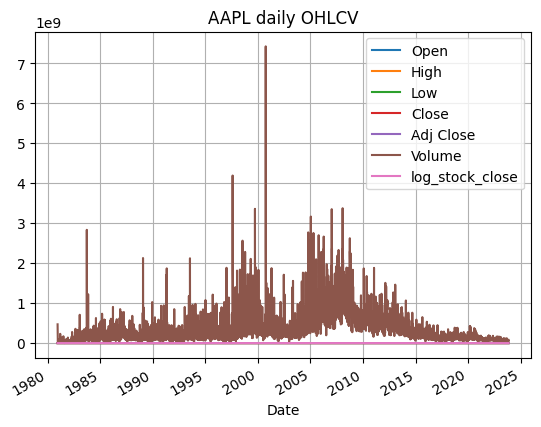

In [57]:
#AAPL_high_low=AAPL.loc[dates_2019,['low','high']]
#print(type(AAPL_high_low))
#Plot the data
AAPL.plot(grid=True,title='AAPL daily OHLCV')

### The scale of the different columns is an issues here, but we can select the columns that we care about to make a cleaner plot

<Axes: title={'center': 'AAPL daily OHLC'}, xlabel='Date'>

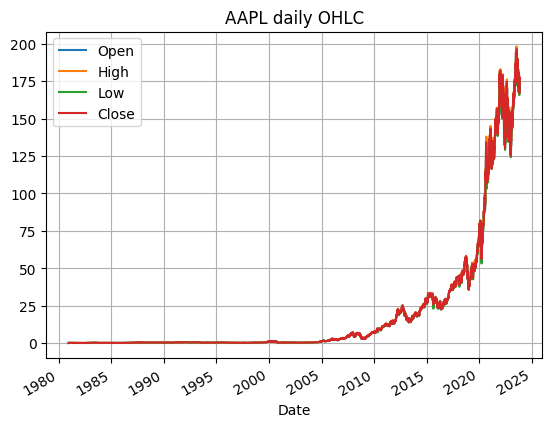

In [58]:
AAPL[["Open","High","Low","Close"]].plot(grid=True,title='AAPL daily OHLC')

###  We will see more on plotting later, but this gives a simple tool to visualize quickly a dataset
---

# Dates and Time slicing

### The python standard library includes ```datetime``` module to handle dates. We can create any date using the method ```datetime.datetime(year,month,day)```

In [59]:
import datetime
#I strongly recommend to have a look at datetime module as you will be often dealing with this when using time-series data 
date=datetime.datetime(2020, 5, 17)
print(date.year)
print(date.month)
print(date.day)

2020
5
17


### If we want to select a range of dates we can use boolean slicing with datetime objects

<class 'pandas.core.frame.DataFrame'>


<Axes: title={'center': 'AAPL 2019 daily high and low'}, xlabel='Date'>

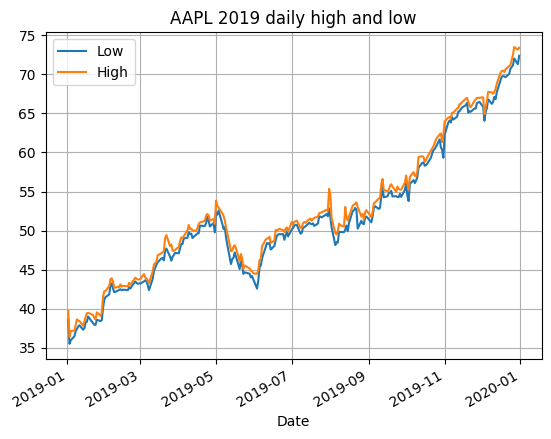

In [60]:
import datetime
# We select just 2019 dates
dates_2019=AAPL.index[(AAPL.index>=datetime.datetime(2019, 1, 1)) & (AAPL.index<datetime.datetime(2020, 1, 1))]
#We slice the dataframe
AAPL_high_low=AAPL.loc[dates_2019,['Low','High']]
print(type(AAPL_high_low))
#Plot the data
AAPL_high_low.plot(grid=True,title='AAPL 2019 daily high and low')

## **Remark**: The reason why we use datetime objects is because the index is also a datetime object, which is the default index in yfinance. However, if dates are represented as strings, once use string comparison (see below) since dates follow lexicographic ordering, which is the default comparison straegy for strings

In [61]:
date="2022-02-02"

print(date>"2023-02-02")

print(date>"2021-01-01")

False
True


In [62]:
string_index=AAPL.index.astype(str)#cast datetime to string
string_index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
       '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object', name='Date', length=10815)

In [63]:
string_index>"2023-01-01"# we can use string comparisson

array([False, False, False, ...,  True,  True,  True])

### It doesn't really matter which date representation you use (either python datetime or string), **but be aware of the difference!!!**
---

# Some useful functions for financial applications: Diff, Shift and pct_change()
### ```dataframe.diff(n)``` computes the difference with respect to the tow n postitions below. Shift ```dataframe.shift(n)``` displaces the dataframe $n$ rows down. ```dataframe.pct_change()``` computes returns

In [64]:
AAPL.Close.diff(1)

Date
1980-12-12         NaN
1980-12-15   -0.006696
1980-12-16   -0.008929
1980-12-17    0.002790
1980-12-18    0.003349
                ...   
2023-10-30    2.069992
2023-10-31    0.480011
2023-11-01    3.199997
2023-11-02    3.600006
2023-11-03   -0.920013
Name: Close, Length: 10815, dtype: float64

In [65]:
AAPL.Close.shift(1)

Date
1980-12-12           NaN
1980-12-15      0.128348
1980-12-16      0.121652
1980-12-17      0.112723
1980-12-18      0.115513
                 ...    
2023-10-30    168.220001
2023-10-31    170.289993
2023-11-01    170.770004
2023-11-02    173.970001
2023-11-03    177.570007
Name: Close, Length: 10815, dtype: float64

In [66]:
AAPL['daily_return'] = AAPL["Close"].pct_change()

In [67]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,log_stock_close,daily_return
Date,,,,,,,,
1980-12-12,0.000000,0.128906,0.128348,0.128348,0.099450,469033600,-2.053010,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,-2.106591,-0.052171
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,-2.182822,-0.073398
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,-2.158372,0.024751
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,-2.129792,0.028992


----
# Iterating over Dataframe rows
### Sometime our analysis requires to go row by row in a dataframe to perform a numerical operation. To do this we can use ```iterrows``` or ```itertuples``` . ```iterrows``` returns a (index,row) tuple whereas ```itertuples``` returns a objects whose index attribute gives the index and the rest of the atributes follow the column names

In [68]:
import time
high_low_mid=np.zeros(len(AAPL))
i=0
start_time=time.time()
for index,row in AAPL.iterrows():
    high_low_mid[i]=0.5*(row.High+row.Low)
    i+=1
print("iterrows took", time.time()-start_time,"seconds")

iterrows took 0.3506159782409668 seconds


In [69]:
print(high_low_mid)

[1.28626995e-01 1.21931002e-01 1.13001999e-01 ... 1.72174995e+02
 1.76620003e+02 1.75085007e+02]


In [70]:
high_low_mid=np.zeros(len(AAPL))
index=0
start_time=time.time()
for row in AAPL.itertuples():    
    high_low_mid[index]=0.5*(row.High+row.Low)
    index+=1
print("itertuples took", time.time()-start_time,"seconds")

itertuples took 0.014031410217285156 seconds


In [71]:
print(high_low_mid)

[1.28626995e-01 1.21931002e-01 1.13001999e-01 ... 1.72174995e+02
 1.76620003e+02 1.75085007e+02]


### **Note:** If going row by row is necessary (as we will see in a minute, vectorisation is always preferred), most of the time `itertuples` is much more efficient 
---

# Vectorisation in DataFrame Columns and slices
### As mentioned in the beginning of the session, internally Pandas stores the data as numpy arrays. Hence, we can make use of vectorisation to speed up computations

In [72]:
%timeit high_low_mid=0.5*(AAPL.High+AAPL.Low)

111 µs ± 390 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [73]:
high_low_mid=0.5*(AAPL.High+AAPL.Low)
high_low_mid.values

array([1.28626995e-01, 1.21931002e-01, 1.13001999e-01, ...,
       1.72174995e+02, 1.76620003e+02, 1.75085007e+02])

In [74]:
#We can apply the same pinciple if we want a slice corresponding to 2019 data

dates_2019=AAPL.index[(AAPL.index>=datetime.datetime(2019, 1, 1)) & (AAPL.index<datetime.datetime(2020, 1, 1))]

%timeit high_low_mid_2019=0.5*(AAPL.High[dates_2019]+AAPL.Low[dates_2019])# gives some performance improvement

%timeit high_low_mid_2019=0.5*(AAPL.loc[dates_2019,'High']+AAPL.loc[dates_2019,'Low'])



581 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
606 µs ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


---
# Complex functions and  ```apply```
### Using ```dataframe.apply``` we can vectorise any user-defined function that supports vectorisation and apply it indexwise (axis=1) or columnwise (axis=0). One can further optimize the method by setting ```raw=False``` which will make assume objects to be numpy arrays internally

In [75]:
AAPL=AAPL.loc[:,['Open','High','Low','Close']]

In [76]:
# Columnwuse
def my_func(x):
    # Function will be applied columnwise x represents the entire column
    return x.max() -x.min() 

%timeit AAPL.apply(my_func,axis=0,raw=False)
%timeit AAPL.apply(my_func,axis=0,raw=True)

AAPL.apply(my_func,axis=0,raw=False)# For each column do maximum -minimum value
    

441 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
109 µs ± 688 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Open     196.240005
High     198.180331
Low      195.230892
Close    196.400890
dtype: float64

In [77]:
def my_func_high_low_mid(x):
    
     # Function will be applied rowise, x the entire 
    return 0.5*(x.High+x.Low) #here we assume x mantains the column structure

def my_func_high_low_mid2(x):
    # Function will be applied rowise, x the entire row casted to numpy array
    return 0.5*(x[1]+x[2]) # We need to use integer slicing

%timeit AAPL.apply(my_func_high_low_mid,axis=1,raw=False)
%timeit AAPL.apply(my_func_high_low_mid2,axis=1,raw=True)

92.8 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
12.5 ms ± 53.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [78]:
AAPL.apply(my_func_high_low_mid2,axis=1,raw=True)

Date
1980-12-12      0.128627
1980-12-15      0.121931
1980-12-16      0.113002
1980-12-17      0.115792
1980-12-18      0.119141
                 ...    
2023-10-30    170.019997
2023-10-31    169.399994
2023-11-01    172.174995
2023-11-02    176.620003
2023-11-03    175.085007
Length: 10815, dtype: float64

### As you can see ```raw=False``` can give dramatic performance improvements as data will be treated as a numpy array

# Rolling windows

### In time-series it is useful to apply a function on observation windows of size $n$. We can do so using ```dataframe.rolling(n)```. The this is followed by the function we want to apply to each rolling window; tipycal choices are ```mean,std,min,max```. For more details and additional arguments see (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)


In [79]:
# Lets compute the 10 day moving average
AAPL.Close.rolling(10).mean()

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2023-10-30    172.427000
2023-10-31    171.789001
2023-11-01    171.602002
2023-11-02    171.813002
2023-11-03    172.190001
Name: Close, Length: 10815, dtype: float64

In [80]:
# Lets compute the 10 day rolling minimum
AAPL.Close.rolling(10).min()

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2023-10-30    166.889999
2023-10-31    166.889999
2023-11-01    166.889999
2023-11-02    166.889999
2023-11-03    166.889999
Name: Close, Length: 10815, dtype: float64

In [81]:
# Lets compute the 10 day rolling std
AAPL.Close.rolling(10).std()

Date
1980-12-12         NaN
1980-12-15         NaN
1980-12-16         NaN
1980-12-17         NaN
1980-12-18         NaN
                ...   
2023-10-30    3.323301
2023-10-31    2.901485
2023-11-01    2.661746
2023-11-02    3.055991
2023-11-03    3.413835
Name: Close, Length: 10815, dtype: float64

# Join/Merge/Concatenate dataframes and series

## 1 Join and Merge

### Now that we have a clear view on basic data manipulation, we can ask ourselves how can we merge data from different Stocks?

In [82]:
list_of_symbols=['aapl','amzn','dis','msft','spy']

dict_of_df={}
for symbol in list_of_symbols:
    dict_of_df[symbol]=yfinance.download(symbol) 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [83]:
dict_of_df['amzn']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400


In [84]:
dict_of_df['aapl']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900


### We can merge two dataframes by index using ```merge```. By setting ```how='inner'``` we make sure that only intersecting indices will be selected and likewise setting ```left_index=True```, ```right_index=True``` we make sure that both indices are being considered 

In [85]:
%timeit merged_df1=dict_of_df['aapl'].merge(dict_of_df['amzn'],how='inner',left_index=True, right_index=True,suffixes=('_aapl','_amzn'))

810 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [86]:
merged_df1=dict_of_df['aapl'].merge(dict_of_df['amzn'],how='inner',left_index=True, right_index=True,suffixes=('_aapl','_amzn'))
merged_df1.head()

,Open_aapl,High_aapl,Low_aapl,Close_aapl,Adj Close_aapl,Volume_aapl,Open_amzn,High_amzn,Low_amzn,Close_amzn,Adj Close_amzn,Volume_amzn
Date,,,,,,,,,,,,
1997-05-15,0.158482,0.160714,0.156250,0.158482,0.134519,99008000,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.156250,0.157366,0.154018,0.154018,0.130730,93296000,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.156250,0.157366,0.151786,0.151786,0.128835,52259200,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.151786,0.155692,0.149554,0.154018,0.130730,84828800,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.152902,0.152902,0.147321,0.150670,0.127888,122248000,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


### Likewise we can perform the same operation using  ```join```

In [87]:
%timeit merged_df2=dict_of_df['aapl'].join(dict_of_df['amzn'],how='inner',lsuffix='_aapl',rsuffix='_amzn')

826 µs ± 17 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [88]:
merged_df2=dict_of_df['aapl'].join(dict_of_df['amzn'],how='inner',lsuffix='_aapl',rsuffix='_amz')
merged_df2.head()

,Open_aapl,High_aapl,Low_aapl,Close_aapl,Adj Close_aapl,Volume_aapl,Open_amz,High_amz,Low_amz,Close_amz,Adj Close_amz,Volume_amz
Date,,,,,,,,,,,,
1997-05-15,0.158482,0.160714,0.156250,0.158482,0.134519,99008000,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.156250,0.157366,0.154018,0.154018,0.130730,93296000,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.156250,0.157366,0.151786,0.151786,0.128835,52259200,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.151786,0.155692,0.149554,0.154018,0.130730,84828800,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.152902,0.152902,0.147321,0.150670,0.127888,122248000,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


### ***Remark***: the difference between ```merge``` and ```join``` is that ```merge``` allows for more flexibility allowing to merge by column values as well. In general, merge performance tends to be better at the cost of providing more arguments

## 2. Adding rows to an existing dataframe
### ```pd.concat``` allows to add additional rows to an existing dataframe

In [89]:
dataframe=pd.DataFrame({"Open": 100,"High": 100,"Low": 100,"Close": 100 },index=[0])
print(dataframe)
AAPL=pd.concat([AAPL,dataframe],ignore_index=True)

   Open  High  Low  Close
0   100   100  100    100


In [90]:
AAPL

,Open,High,Low,Close
0,0.000000,0.128906,0.128348,0.128348
1,0.122210,0.122210,0.121652,0.121652
2,0.113281,0.113281,0.112723,0.112723
3,0.115513,0.116071,0.115513,0.115513
4,0.118862,0.119420,0.118862,0.118862
...,...,...,...,...
10811,169.350006,170.899994,167.899994,170.770004
10812,171.000000,174.229996,170.119995,173.970001
10813,175.520004,177.779999,175.460007,177.570007
10814,174.240005,176.820007,173.350006,176.649994


In [91]:
pd.concat([dict_of_df['aapl'],dict_of_df['amzn']])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400


## 3. Concat dictionaries and Multi_indexing
### Concatenate allows to merge multiple df at once, but will create a multi-index/multi-column data frame

In [92]:
df1=pd.concat(dict_of_df,axis=1)
df1

aapl                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
1962-01-02         NaN         NaN         NaN         NaN         NaN   
1962-01-03         NaN         NaN         NaN         NaN         NaN   
1962-01-04         NaN         NaN         NaN         NaN         NaN   
1962-01-05         NaN         NaN         NaN         NaN         NaN   
1962-01-08         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-10-30  169.020004  171.169998  168.869995  170.289993  170.289993   
2023-10-31  169.350006  170.899994  167.899994  170.770004  170.770004   
2023-11-01  171.000000  174.229996  170.119995  173.970001  173.970001   
2023-11-02  175.520004  177.779999  175.460007  177.570007  177.570007   
2023-11-03  174.240005  176.820007  173.350006  176.649994  176.649994   

                              amzn                                      ...  \
                Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
1962-01-02         NaN         NaN         NaN         NaN         NaN  ...   
1962-01-03         NaN         NaN         NaN         NaN         NaN  ...   
1962-01-04         NaN         NaN         NaN         NaN         NaN  ...   
1962-01-05         NaN         NaN         NaN         NaN         NaN  ...   
1962-01-08         NaN         NaN         NaN         NaN         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2023-10-30  51131000.0  129.720001  133.000000  128.559998  132.710007  ...   
2023-10-31  44846000.0  132.750000  133.570007  131.710007  133.089996  ...   
2023-11-01  56934900.0  133.960007  137.350006  133.710007  137.000000  ...   
2023-11-02  77334800.0  138.729996  138.809998  136.470001  138.070007  ...   
2023-11-03  79763700.0  138.990005  139.490005  137.449997  138.600006  ...   

                  msft                                             spy  \
                   Low       Close   Adj Close      Volume        Open   
Date                                                                     
1962-01-02         NaN         NaN         NaN         NaN         NaN   
1962-01-03         NaN         NaN         NaN         NaN         NaN   
1962-01-04         NaN         NaN         NaN         NaN         NaN   
1962-01-05         NaN         NaN         NaN         NaN         NaN   
1962-01-08         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-10-30  331.829987  337.309998  337.309998  22828100.0  413.559998   
2023-10-31  334.690002  338.109985  338.109985  20265300.0  416.179993   
2023-11-01  339.649994  346.070007  346.070007  28158800.0  419.200012   
2023-11-02  344.769989  348.320007  348.320007  24348100.0  426.579987   
2023-11-03  347.329987  352.799988  352.799988  23624000.0  433.140015   

                                                                         
                  High         Low       Close   Adj Close       Volume  
Date                                                                     
1962-01-02         NaN         NaN         NaN         NaN          NaN  
1962-01-03         NaN         NaN         NaN         NaN          NaN  
1962-01-04         NaN         NaN         NaN         NaN          NaN  
1962-01-05         NaN         NaN         NaN         NaN          NaN  
1962-01-08         NaN         NaN         NaN         NaN          NaN  
...                ...         ...         ...         ...          ...  
2023-10-30  416.679993  412.220001  415.589996  415.589996   86562700.0  
2023-10-31  418.529999  414.209991  418.200012  418.200012   79665200.0  
2023-11-01  423.500000 

In [93]:
df2=pd.concat(dict_of_df,axis=0)
df2

Open        High         Low       Close   Adj Close  \
     Date                                                                     
aapl 1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099450   
     1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094261   
     1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087343   
     1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089504   
     1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092099   
...                     ...         ...         ...         ...         ...   
spy  2023-10-30  413.559998  416.679993  412.220001  415.589996  415.589996   
     2023-10-31  416.179993  418.529999  414.209991  418.200012  418.200012   
     2023-11-01  419.200012  423.500000  418.649994  422.660004  422.660004   
     2023-11-02  426.579987  430.920013  426.559998  430.760010  430.760010   
     2023-11-03  433.140015  436.290009  433.010010  434.690002  434.690002   

                    Volume  
     Date                   
aapl 1980-12-12  469033600  
     1980-12-15  175884800  
     1980-12-16  105728000  
     1980-12-17   86441600  
     1980-12-18   73449600  
...                    ...  
spy  2023-10-30   86562700  
     2023-10-31   79665200  
     2023-11-01   98068100  
     2023-11-02   94938900  
     2023-11-03  100110800  

[50283 rows x 6 columns]

### This introduces multi_indexing e.g. indices or columns that are 2D arrays or in general n dimensional arrays

In [94]:
df1.columns

MultiIndex([('aapl',      'Open'),
            ('aapl',      'High'),
            ('aapl',       'Low'),
            ('aapl',     'Close'),
            ('aapl', 'Adj Close'),
            ('aapl',    'Volume'),
            ('amzn',      'Open'),
            ('amzn',      'High'),
            ('amzn',       'Low'),
            ('amzn',     'Close'),
            ('amzn', 'Adj Close'),
            ('amzn',    'Volume'),
            ( 'dis',      'Open'),
            ( 'dis',      'High'),
            ( 'dis',       'Low'),
            ( 'dis',     'Close'),
            ( 'dis', 'Adj Close'),
            ( 'dis',    'Volume'),
            ('msft',      'Open'),
            ('msft',      'High'),
            ('msft',       'Low'),
            ('msft',     'Close'),
            ('msft', 'Adj Close'),
            ('msft',    'Volume'),
            ( 'spy',      'Open'),
            ( 'spy',      'High'),
            ( 'spy',       'Low'),
            ( 'spy',     'Close'),
            ( 'spy',

### The good news is that we can efficiently use slicing with  ```loc```, see examples below

In [95]:
df1.loc[:,('msft','Close')]#retrieve all rows for msft and close

Date
1962-01-02           NaN
1962-01-03           NaN
1962-01-04           NaN
1962-01-05           NaN
1962-01-08           NaN
                 ...    
2023-10-30    337.309998
2023-10-31    338.109985
2023-11-01    346.070007
2023-11-02    348.320007
2023-11-03    352.799988
Name: (msft, Close), Length: 15568, dtype: float64

In [96]:
df1.loc[:,('msft')]#retrieve all rows and columns for msft and close

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-10-30,333.410004,339.450012,331.829987,337.309998,337.309998,22828100.0
2023-10-31,338.850006,339.000000,334.690002,338.109985,338.109985,20265300.0
2023-11-01,339.790009,347.420013,339.649994,346.070007,346.070007,28158800.0


### If we want to select all elements at a given index level, we can use ```slice(None)``` at that level instead of the more intuitive ```:``` that we are used to

In [97]:
df1.loc[:,(slice(None),"Close")]

,aapl,amzn,dis,msft,spy
,Close,Close,Close,Close,Close
Date,,,,,
1962-01-02,NaN,NaN,0.092908,NaN,NaN
1962-01-03,NaN,NaN,0.094155,NaN,NaN
1962-01-04,NaN,NaN,0.094155,NaN,NaN
1962-01-05,NaN,NaN,0.094467,NaN,NaN
1962-01-08,NaN,NaN,0.094155,NaN,NaN
...,...,...,...,...,...
2023-10-30,170.289993,132.710007,80.680000,337.309998,415.589996
2023-10-31,170.770004,133.089996,81.589996,338.109985,418.200012


### This way we can nicely obtain all close time series for many symbols

In [98]:
df2.index

MultiIndex([('aapl', '1980-12-12'),
            ('aapl', '1980-12-15'),
            ('aapl', '1980-12-16'),
            ('aapl', '1980-12-17'),
            ('aapl', '1980-12-18'),
            ('aapl', '1980-12-19'),
            ('aapl', '1980-12-22'),
            ('aapl', '1980-12-23'),
            ('aapl', '1980-12-24'),
            ('aapl', '1980-12-26'),
            ...
            ( 'spy', '2023-10-23'),
            ( 'spy', '2023-10-24'),
            ( 'spy', '2023-10-25'),
            ( 'spy', '2023-10-26'),
            ( 'spy', '2023-10-27'),
            ( 'spy', '2023-10-30'),
            ( 'spy', '2023-10-31'),
            ( 'spy', '2023-11-01'),
            ( 'spy', '2023-11-02'),
            ( 'spy', '2023-11-03')],
           names=[None, 'Date'], length=50283)

In [99]:
df2.loc[('aapl'),:]### retrieve all columns for aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900


---
# Creating a Multi-Index and performing Groupby operations


### Groupby allows to index data using different columns or compute summary statistics for groups wihin the data. Let's look at some option data


In [100]:
import numpy as np
import pandas as pd

In [101]:
option_data=pd.read_csv('AMZN_options.csv')
option_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expiration_date,option_type
0,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,True,REGULAR,USD,2020-11-06,C
1,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
2,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
3,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,True,REGULAR,USD,2020-11-06,C
4,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,AMZN230120P03600000,2020-10-28 16:43:01,3600.0,980.00,1061.70,1078.45,0.00000,0.000000,1.0,2.0,0.375985,True,REGULAR,USD,2023-01-20,P
6033,AMZN230120P03900000,2020-09-30 15:21:16,3900.0,1166.30,1227.55,1245.00,0.00000,0.000000,1.0,0.0,0.340918,True,REGULAR,USD,2023-01-20,P
6034,AMZN230120P04000000,2020-10-21 13:47:58,4000.0,1247.25,1359.95,1376.50,0.00000,0.000000,55.0,59.0,0.371846,True,REGULAR,USD,2023-01-20,P
6035,AMZN230120P04800000,2020-10-14 19:58:31,4800.0,1795.00,2017.40,2033.00,0.00000,0.000000,5.0,4.0,0.363714,True,REGULAR,USD,2023-01-20,P


### This dataframe contains multiple option data. As you may already now each option is uniquely defined by "expiration_date" and "option_type". We can create a custom multi-index in our dataframe by using the ```dataframe.set_index(["column1","column2",...])```

In [102]:
indexed_option_data=option_data.set_index(["expiration_date","option_type"])
indexed_option_data

contractSymbol        lastTradeDate  strike  \
expiration_date option_type                                                     
2020-11-06      C            AMZN201106C01820000  2020-11-02 18:28:21  1820.0   
                C            AMZN201106C01830000  2020-11-02 18:28:21  1830.0   
                C            AMZN201106C01840000  2020-11-02 18:28:21  1840.0   
                C            AMZN201106C01850000  2020-11-02 18:28:21  1850.0   
                C            AMZN201106C01870000  2020-11-02 14:34:36  1870.0   
...                                          ...                  ...     ...   
2023-01-20      P            AMZN230120P03600000  2020-10-28 16:43:01  3600.0   
                P            AMZN230120P03900000  2020-09-30 15:21:16  3900.0   
                P            AMZN230120P04000000  2020-10-21 13:47:58  4000.0   
                P            AMZN230120P04800000  2020-10-14 19:58:31  4800.0   
                P            AMZN230120P05000000  2020-10-22 18:55:34  5000.0   

                             lastPrice      bid      ask    change  \
expiration_date option_type                                          
2020-11-06      C              1148.70  1139.35  1143.20 -62.51001   
                C              1146.25  1123.35  1127.75 -56.18994   
                C              1128.45  1116.55  1120.70 -62.75000   
                C              1126.00  1108.85  1112.60 -56.47998   
                C              1201.10  1086.10  1092.25 -17.23999   
...                                ...      ...      ...       ...   
2023-01-20      P               980.00  1061.70  1078.45   0.00000   
                P              1166.30  1227.55  1245.00   0.00000   
                P              1247.25  1359.95  1376.50   0.00000   
                P              1795.00  2017.40  2033.00   0.00000   
                P              2051.20  2193.50  2203.00   0.00000   

                             percentChange  volume  openInterest  \
expiration_date option_type                                        
2020-11-06      C                -5.160956    15.0           4.0   
                C                -4.672994     1.0           2.0   
                C                -5.267798     1.0           2.0   
                C                -4.776401     1.0           3.0   
                C                -1.415039     2.0           2.0   
...                                    ...     ...           ...   
2023-01-20      P                 0.000000     1.0           2.0   
                P                 0.000000     1.0           0.0   
                P                 0.000000    55.0          59.0   
                P                 0.000000     5.0           4.0   
                P                 0.000000     1.0           1.0   

                             impliedVolatility  inTheMoney contractSize  \
expiration_date option_type                                               
2020-11-06      C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
...                                        ...         ...          ...   
2023-01-20      P                     0.375985        True      REGULAR   
                P                     0.340918        True      REGULAR   
                P                     0.371846        True      REGULAR   
                P                     0.363714        True      REGULAR   
                P                     0.358921        True      REGULAR   

                            currency  
expiration_date option_type           
2020-11-06      C                USD  
                C                USD  
                C                USD  
             

In [103]:
indexed_option_data.loc[("2020-11-06",),:]##retrieve all options for a given expiration

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
option_type,,,,,,,,,,,,,,
C,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,True,REGULAR,USD
C,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,True,REGULAR,USD
C,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.000010,True,REGULAR,USD
C,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,True,REGULAR,USD
C,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P,AMZN201106P04550000,2020-11-02 15:27:12,4550.0,1540.00,1587.50,1591.95,246.44995,19.052217,1.0,1.0,2.030950,True,REGULAR,USD
P,AMZN201106P04650000,2020-10-30 15:11:44,4650.0,1565.65,1686.55,1691.95,0.00000,0.000000,1.0,0.0,2.097234,True,REGULAR,USD
P,AMZN201106P04700000,2020-10-30 17:11:39,4700.0,1661.40,1737.35,1742.15,0.00000,0.000000,4.0,2.0,2.151738,True,REGULAR,USD


In [104]:
indexed_option_data.loc[("2020-11-06","C"),:]#retrieve all Call options for a given expiration

contractSymbol        lastTradeDate  strike  \
expiration_date option_type                                                     
2020-11-06      C            AMZN201106C01820000  2020-11-02 18:28:21  1820.0   
                C            AMZN201106C01830000  2020-11-02 18:28:21  1830.0   
                C            AMZN201106C01840000  2020-11-02 18:28:21  1840.0   
                C            AMZN201106C01850000  2020-11-02 18:28:21  1850.0   
                C            AMZN201106C01870000  2020-11-02 14:34:36  1870.0   
...                                          ...                  ...     ...   
                C            AMZN201106C04650000  2020-11-02 15:54:50  4650.0   
                C            AMZN201106C04700000  2020-10-30 19:55:10  4700.0   
                C            AMZN201106C04750000  2020-11-02 17:32:06  4750.0   
                C            AMZN201106C04800000  2020-10-30 18:56:49  4800.0   
                C            AMZN201106C04850000  2020-11-02 19:06:05  4850.0   

                             lastPrice      bid      ask    change  \
expiration_date option_type                                          
2020-11-06      C              1148.70  1139.35  1143.20 -62.51001   
                C              1146.25  1123.35  1127.75 -56.18994   
                C              1128.45  1116.55  1120.70 -62.75000   
                C              1126.00  1108.85  1112.60 -56.47998   
                C              1201.10  1086.10  1092.25 -17.23999   
...                                ...      ...      ...       ...   
                C                 0.01     0.00     0.08   0.00000   
                C                 0.04     0.00     0.03   0.00000   
                C                 0.01     0.00     0.04  -0.04000   
                C                 0.01     0.00     0.01  -0.04000   
                C                 0.01     0.00     0.01  -0.02000   

                             percentChange  volume  openInterest  \
expiration_date option_type                                        
2020-11-06      C                -5.160956    15.0           4.0   
                C                -4.672994     1.0           2.0   
                C                -5.267798     1.0           2.0   
                C                -4.776401     1.0           3.0   
                C                -1.415039     2.0           2.0   
...                                    ...     ...           ...   
                C                 0.000000     2.0         239.0   
                C                 0.000000    64.0         121.0   
                C               -79.999990     6.0          73.0   
                C               -79.999990     2.0         229.0   
                C               -66.666670   398.0         433.0   

                             impliedVolatility  inTheMoney contractSize  \
expiration_date option_type                                               
2020-11-06      C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
...                                        ...         ...          ...   
                C                     1.121098       False      REGULAR   
                C                     1.070317       False      REGULAR   
                C                     1.117192       False      REGULAR   
                C                     1.046880       False      REGULAR   
                C                     1.062505       False      REGULAR   

                            currency  
expiration_date option_type           
2020-11-06      C                USD  
                C                USD  
                C                USD  
             

### We can use the ```groupby``` method to apply a function such as mean,std,min,max to our data grouped in a particular way ```dataframe.groupby([column1,column2,...]).function()```, where the function operations are applied columnwise

### Note that groupby tipically returns a multi-index dataframe

In [105]:
option_data.groupby(["expiration_date","option_type"]).max() #gives the maximum value for each expiration/option_type combination

contractSymbol        lastTradeDate  strike  \
expiration_date option_type                                                     
2020-11-06      C            AMZN201106C04850000  2020-11-02 19:11:10  4850.0   
                P            AMZN201106P04850000  2020-11-02 19:11:17  4850.0   
2020-11-13      C            AMZN201113C04850000  2020-11-02 19:11:10  4850.0   
                P            AMZN201113P04650000  2020-11-02 19:11:15  4650.0   
2020-11-20      C            AMZN201120C05300000  2020-11-02 19:10:24  5300.0   
                P            AMZN201120P05300000  2020-11-02 19:10:56  5300.0   
2020-11-27      C            AMZN201127C04850000  2020-11-02 19:10:50  4850.0   
                P            AMZN201127P04550000  2020-11-02 19:10:56  4550.0   
2020-12-04      C            AMZN201204C03800000  2020-11-02 19:09:31  3800.0   
                P            AMZN201204P03440000  2020-11-02 19:06:10  3440.0   
2020-12-11      C            AMZN201211C03300000  2020-11-02 19:06:56  3300.0   
                P            AMZN201211P03300000  2020-11-02 19:06:01  3300.0   
2020-12-18      C            AMZN201218C05300000  2020-11-02 19:09:59  5300.0   
                P            AMZN201218P05300000  2020-11-02 19:10:15  5300.0   
2021-01-15      C            AMZN210115C05300000  2020-11-02 19:09:43  5300.0   
                P            AMZN210115P05300000  2020-11-02 19:09:28  5300.0   
2021-02-19      C            AMZN210219C05300000  2020-11-02 19:09:55  5300.0   
                P            AMZN210219P05000000  2020-11-02 19:09:25  5000.0   
2021-03-19      C            AMZN210319C05300000  2020-11-02 19:07:23  5300.0   
                P            AMZN210319P05200000  2020-11-02 19:10:45  5200.0   
2021-04-16      C            AMZN210416C05300000  2020-11-02 18:59:31  5300.0   
                P            AMZN210416P05300000  2020-11-02 19:06:10  5300.0   
2021-06-18      C            AMZN210618C05300000  2020-11-02 19:10:53  5300.0   
                P            AMZN210618P05250000  2020-11-02 19:10:24  5250.0   
2021-07-16      C            AMZN210716C05300000  2020-11-02 18:54:24  5300.0   
                P            AMZN210716P05200000  2020-11-02 18:53:52  5200.0   
2021-08-20      C            AMZN210820C05300000  2020-11-02 19:09:31  5300.0   
                P            AMZN210820P05250000  2020-11-02 18:53:18  5250.0   
2021-09-17      C            AMZN210917C05100000  2020-11-02 19:08:53  5100.0   
                P            AMZN210917P04250000  2020-11-02 19:08:53  4250.0   
2021-10-15      C            AMZN211015C05000000  2020-11-02 19:02:59  5000.0   
                P            AMZN211015P03500000  2020-11-02 18:50:10  3500.0   
2022-01-21      C            AMZN220121C05300000  2020-11-02 19:10:30  5300.0   
                P            AMZN220121P05300000  2020-11-02 19:07:17  5300.0   
2022-06-17      C            AMZN220617C05300000  2020-11-02 19:04:09  5300.0   
                P            AMZN220617P05000000  2020-11-02 16:59:03  5000.0   
2023-01-20      C            AMZN230120C05100000  2020-11-02 19:10:39  5100.0   
                P            AMZN230120P05000000  2020-11-02 19:08:37  5000.0   

                             lastPrice      bid      ask      change  \
expiration_date option_type                                            
2020-11-06      C              1202.70  1139.35  1143.20   42.630005   
                P              1808.05  1887.65  1891.85  246.449950   
2020-11-13      C              1342.65  1068.65  1074.90   22.070007   
                P              1554.05  1684.90  1693.05  191.490020   
2020-11-20      C              1890.27  1759.05  1763.30   15.250000   
                P              2200.95  2342.50  2346.65  381.300050   
2020-11-27      C              1316.60  1096.70  1101.90    6.730003   
                P              1394.30  1590.10  1597.65  105.500000   
2020-12-04      C               957.51   761.60   770.75    0.000000   
 

In [106]:
grouped_option_chain=option_data.groupby(["expiration_date","option_type","strike"]).sum()

In [107]:
grouped_option_chain

contractSymbol        lastTradeDate  \
expiration_date option_type strike                                             
2020-11-06      C           1820.0  AMZN201106C01820000  2020-11-02 18:28:21   
                            1830.0  AMZN201106C01830000  2020-11-02 18:28:21   
                            1840.0  AMZN201106C01840000  2020-11-02 18:28:21   
                            1850.0  AMZN201106C01850000  2020-11-02 18:28:21   
                            1870.0  AMZN201106C01870000  2020-11-02 14:34:36   
...                                                 ...                  ...   
2023-01-20      P           3600.0  AMZN230120P03600000  2020-10-28 16:43:01   
                            3900.0  AMZN230120P03900000  2020-09-30 15:21:16   
                            4000.0  AMZN230120P04000000  2020-10-21 13:47:58   
                            4800.0  AMZN230120P04800000  2020-10-14 19:58:31   
                            5000.0  AMZN230120P05000000  2020-10-22 18:55:34   

                                    lastPrice      bid      ask    change  \
expiration_date option_type strike                                          
2020-11-06      C           1820.0    1148.70  1139.35  1143.20 -62.51001   
                            1830.0    1146.25  1123.35  1127.75 -56.18994   
                            1840.0    1128.45  1116.55  1120.70 -62.75000   
                            1850.0    1126.00  1108.85  1112.60 -56.47998   
                            1870.0    1201.10  1086.10  1092.25 -17.23999   
...                                       ...      ...      ...       ...   
2023-01-20      P           3600.0     980.00  1061.70  1078.45   0.00000   
                            3900.0    1166.30  1227.55  1245.00   0.00000   
                            4000.0    1247.25  1359.95  1376.50   0.00000   
                            4800.0    1795.00  2017.40  2033.00   0.00000   
                            5000.0    2051.20  2193.50  2203.00   0.00000   

                                    percentChange  volume  openInterest  \
expiration_date option_type strike                                        
2020-11-06      C           1820.0      -5.160956    15.0           4.0   
                            1830.0      -4.672994     1.0           2.0   
                            1840.0      -5.267798     1.0           2.0   
                            1850.0      -4.776401     1.0           3.0   
                            1870.0      -1.415039     2.0           2.0   
...                                           ...     ...           ...   
2023-01-20      P           3600.0       0.000000     1.0           2.0   
                            3900.0       0.000000     1.0           0.0   
                            4000.0       0.000000    55.0          59.0   
                            4800.0       0.000000     5.0           4.0   
                            5000.0       0.000000     1.0           1.0   

                                    impliedVolatility  inTheMoney  \
expiration_date option_type strike                                  
2020-11-06      C           1820.0           0.000010           1   
                            1830.0           0.000010           1   
                            1840.0           0.000010           1   
                            1850.0           0.000010           1   
                            1870.0           0.000010           1   
...                                               ...         ...   
2023-01-20      P           3600.0           0.375985           1   
                            3900.0           0.340918           1   
                            4000.0           0.371846           1   
                            4800.0           0.363714           1   
                            5000.0           0.358921           1   

                                   contractSize currency  
expiration_date option_type strike                        
2020-1

In [108]:
grouped_option_chain.loc[('2020-11-06','C'),:]

,contractSymbol,lastTradeDate,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
strike,,,,,,,,,,,,,
1820.0,AMZN201106C01820000,2020-11-02 18:28:21,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,1,REGULAR,USD
1830.0,AMZN201106C01830000,2020-11-02 18:28:21,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,1,REGULAR,USD
1840.0,AMZN201106C01840000,2020-11-02 18:28:21,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.000010,1,REGULAR,USD
1850.0,AMZN201106C01850000,2020-11-02 18:28:21,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,1,REGULAR,USD
1870.0,AMZN201106C01870000,2020-11-02 14:34:36,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,1,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650.0,AMZN201106C04650000,2020-11-02 15:54:50,0.01,0.00,0.08,0.00000,0.000000,2.0,239.0,1.121098,0,REGULAR,USD
4700.0,AMZN201106C04700000,2020-10-30 19:55:10,0.04,0.00,0.03,0.00000,0.000000,64.0,121.0,1.070317,0,REGULAR,USD
4750.0,AMZN201106C04750000,2020-11-02 17:32:06,0.01,0.00,0.04,-0.04000,-79.999990,6.0,73.0,1.117192,0,REGULAR,USD


# Some quick and **non-examinable** final remarks on ```dropna``` and ```interpolate```


In [109]:
### Let's introduce some missing values and see how we can remove or interpolate values

In [110]:
AAPL_copy=AAPL.iloc[:,:-1]
AAPL_copy.iloc[2,:]=np.nan
AAPL_copy.head()

/tmp/ipykernel_10185/1693436740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_copy.iloc[2,:]=np.nan


,Open,High,Low
0,0.000000,0.128906,0.128348
1,0.122210,0.122210,0.121652
2,NaN,NaN,NaN
3,0.115513,0.116071,0.115513
4,0.118862,0.119420,0.118862


In [113]:
# Dropna just removes the rows that contain a NaN
AAPL_copy.dropna(axis=0)
# We can also use axis=1 to drop columns

,Open,High,Low
0,0.000000,0.128906,0.128348
1,0.122210,0.122210,0.121652
3,0.115513,0.116071,0.115513
4,0.118862,0.119420,0.118862
5,0.126116,0.126674,0.126116
...,...,...,...
10811,169.350006,170.899994,167.899994
10812,171.000000,174.229996,170.119995
10813,175.520004,177.779999,175.460007
10814,174.240005,176.820007,173.350006


In [114]:
AAPL_copy.interpolate(method='linear', axis=0)

,Open,High,Low
0,0.000000,0.128906,0.128348
1,0.122210,0.122210,0.121652
2,0.118862,0.119141,0.118582
3,0.115513,0.116071,0.115513
4,0.118862,0.119420,0.118862
...,...,...,...
10811,169.350006,170.899994,167.899994
10812,171.000000,174.229996,170.119995
10813,175.520004,177.779999,175.460007
10814,174.240005,176.820007,173.350006


# Further reading for big data

### If you are dealing with big data is likely that pandas will consume all your memory, so other tools are preferred which use *lazy evaluation* like VAEX https://pypi.org/project/vaex/ or PySpark https://spark.apache.org/docs/latest/api/python/index.html 

### Lazy evaluation essentially means that a plan will be set to execute your operation, but it won't be actually executed until you need to retrieve a value. For instance creating a new column can be a lazy operation until we need to retrieve some value in that column.

### This approach allows to use multiprocessing to speed up calculations